In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
data = pd.read_csv("D://Non Acad data//data//global_heat_index.csv")

In [24]:
data.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [25]:
clean1 = data[data['Hour']<6]     # for all the days where hour is less than 6 am is taken 
clean2 = data[data['Hour']>18]

In [26]:
clean1.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0
26,2011,1,2,2,3,9.165823,984.032227,66.509376,90.634872,1.904846,0
27,2011,1,2,3,3,8.773836,984.161560,69.923065,90.924843,1.597840,0


In [27]:
clean2.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
19,2011,1,1,19,4,13.915211,987.175781,52.122064,38.189991,2.709682,0
20,2011,1,1,20,3,13.106395,987.245666,53.782549,45.614468,2.713746,0
21,2011,1,1,21,3,12.326217,986.971375,55.613451,53.939449,2.701125,0
22,2011,1,1,22,3,11.570982,986.042419,57.458358,62.491528,2.639709,0
23,2011,1,1,23,3,10.869849,985.439819,59.446614,71.250389,2.511646,0
43,2011,1,2,19,5,14.152280,987.563416,54.899280,64.419899,2.399542,0
44,2011,1,2,20,4,13.421063,987.949341,55.893813,73.117203,2.673051,0
45,2011,1,2,21,4,12.687589,987.704529,57.250441,81.467941,2.940782,0
46,2011,1,2,22,4,11.969086,987.413086,58.991594,89.379547,3.099676,0
47,2011,1,2,23,4,11.248868,986.698791,61.125686,96.687325,3.158645,0


In [28]:
data = data.drop(clean1.index, axis =0)
data = data.drop(clean2.index, axis =0)

In [29]:
data.info

<bound method DataFrame.info of        Year  Month  Day  Hour  Dew Point  Temperature    Pressure  \
6      2011      1    1     6          2     7.806705  986.249146   
7      2011      1    1     7          2     9.036408  987.038940   
8      2011      1    1     8          3    12.158280  987.897400   
9      2011      1    1     9          3    14.965301  988.211914   
10     2011      1    1    10          3    18.956082  988.054504   
...     ...    ...  ...   ...        ...          ...         ...   
17510  2012     12   31    14         -8    24.219059  983.661621   
17511  2012     12   31    15         -9    22.715263  983.482239   
17512  2012     12   31    16         -7    19.968041  983.660339   
17513  2012     12   31    17         -5    16.706517  983.768677   
17514  2012     12   31    18         -6    15.605749  984.232483   

       Relative Humidity  Wind Direction  Wind Speed  Solar Radiation (GHI)  
6              67.093181       95.835983    1.815175         

In [30]:
print("Cleaned Data: ")
data.head(10) 

Cleaned Data: 


,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430


In [31]:
# we want all column but solar radiation, those are our features
# 9 columns are needed and all rows needed
x = data.drop(['Solar Radiation (GHI)'], axis = 1)
y = data.iloc[:,10].values   # -1 means last column

In [32]:
from sklearn.preprocessing import MinMaxScaler
x = pd.DataFrame(MinMaxScaler().fit(x).transform(x))

In [33]:
col  = ['Year', 'Month', 'Day','Hour','Dew Point','Temperature',
        'Pressure','Relative Humidity','Wind Direction','Wind Speed' ]

In [34]:
# SELECT K BEST METHOD
# using chi square test
# extracting top 4 features

In [35]:
best_feature = SelectKBest(score_func = chi2, k=10)


In [38]:
fit = best_feature.fit(x, y)

In [39]:
scores = pd.DataFrame(fit.scores_)
column = pd.DataFrame(col)

In [41]:
feature_score = pd.concat([column, scores], axis = 1)
feature_score.columns = ['Feature', 'Score']

In [42]:
feature_score.nlargest(10, 'Score')

,Feature,Score
0,Year,504.976721
7,Relative Humidity,397.828591
5,Temperature,306.062548
3,Hour,271.978728
1,Month,236.303859
8,Wind Direction,221.823327
6,Pressure,213.040872
2,Day,208.497847
9,Wind Speed,148.735716
4,Dew Point,74.952667


In [43]:
# VISUALISATION

<Axes: >

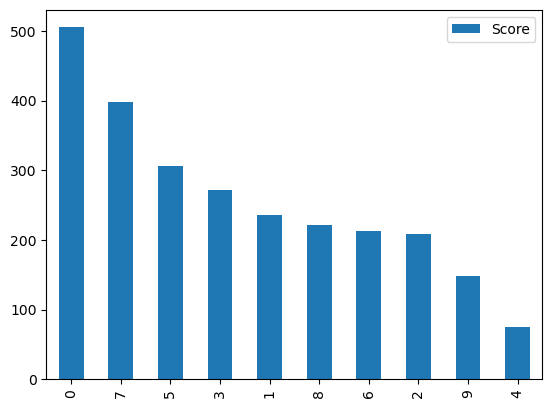

In [45]:
feature_score.nlargest(10, 'Score').plot(kind = 'bar')